# Fitness Trackers

Práctica de Python de Programación Orientada a Ciencia de Datos

Autores: Antonio Fernández Cáceres

### 1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

In [2]:
import math
import pandas as pd

datos = pd.read_csv("Fitness_trackers.csv")
datos.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,"2,499","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,"2,099","2,499",AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,"1,722","2,099",LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,"2,469","2,999",AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,"1,799","2,199",OLED Display,4.3,Plastic,7,NaN


#### 1.1 Número de muestras (valores distintos de missing):

In [3]:
nMuestras = []
for column in datos.columns:
    nMuestras.append([column, len(datos[column].dropna())])
nMuestras

[['Brand Name', 565],
 ['Device Type', 565],
 ['Model Name', 565],
 ['Color', 565],
 ['Selling Price', 565],
 ['Original Price', 565],
 ['Display', 565],
 ['Rating (Out of 5)', 514],
 ['Strap Material', 565],
 ['Average Battery Life (in days)', 565],
 ['Reviews', 78]]

Se comprueba que **Rating (Out of 5)** y **Reviews** tienen valores _missing_.

#### 1.2 y 1.3 Media, desviación estándar, mínimo y máximo de aquellas variables en las que tenga sentido (numéricas):

In [4]:
datos.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                      object
Original Price                     object
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                            object
dtype: object

Si comparamos los tipos asignados con los numéricos, vemos que además del **Rating (Out of 5)**  y **Average Battery Life** también deberían ser numéricos **Selling Price**, **Original Price** y **Reviews**

Si buscamos precios de los trackers en internet, nos daremos cuenta de que su precio de venta se corresponde con el de la India (está en Rupias), y esto confirma que **los precios con los que tratamos son números enteros**.

Convertimos las observaciones de las tres variables a numérico, eliminando las comas de miles:

In [5]:
datos["Selling Price"] = pd.to_numeric(datos["Selling Price"].str.replace(',',''))
datos["Original Price"] = pd.to_numeric(datos["Original Price"].str.replace(',',''))
datos["Reviews"] = pd.to_numeric(datos["Reviews"].str.replace(',',''))

Confirmamos que las conversiones son correctas:

In [6]:
datos.head(10)

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN
5,Xiaomi,FitnessBand,Band - HRX Edition,Black,1299,1799,OLED Display,4.2,Plastic,20,NaN
6,Xiaomi,FitnessBand,Band 2,Black,2499,2499,OLED Display,4.3,Plastic,7,NaN
7,Xiaomi,Smartwatch,Revolve,Black,12349,15999,AMOLED Display,4.4,Silicone,14,2.0
8,Xiaomi,Smartwatch,RevolveActive,Black,12999,15999,AMOLED Display,4.4,Silicone,14,3.0
9,Xiaomi,FitnessBand,Smart Band 3i,Black,1270,1599,OLED Display,4.2,Thermoplastic polyurethane,7,NaN


In [7]:
datos.dtypes

Brand Name                         object
Device Type                        object
Model Name                         object
Color                              object
Selling Price                       int64
Original Price                      int64
Display                            object
Rating (Out of 5)                 float64
Strap Material                     object
Average Battery Life (in days)      int64
Reviews                           float64
dtype: object

In [8]:
variablesNumericas = datos._get_numeric_data()
mediaNumericas = round(variablesNumericas.mean(), 3) # No hay que preocuparse por los NaN, puesto que quedan excluídos del cálculo
stdNumericas = round(variablesNumericas.std(), 3)
minNumericas = round(variablesNumericas.min(), 3)
maxNumericas = round(variablesNumericas.max(), 3)

valoresInteres = pd.DataFrame([mediaNumericas,stdNumericas,minNumericas,maxNumericas], columns=["Selling Price","Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"])
valoresInteres["Valor"] = ["Media", "Desviación Estándar", "Mínimo", "Máximo"]
valoresInteres.set_index("Valor", inplace = True)

valoresInteres

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Valor,,,,,
Media,22110.373,25365.361,4.230,9.027,2492.949
Desviación Estándar,19914.926,20384.029,0.391,7.869,5607.530
Mínimo,1195.000,1599.000,2.000,1.000,2.000
Máximo,122090.000,122090.000,5.000,45.000,23426.000


### 2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
* Por tipo de dispositivo



In [9]:
# Tipos de dispositivo:

tiposDisp = list(set(datos["Device Type"]))
print(tiposDisp)

['FitnessBand', 'Smartwatch']


* Por precio de venta. Estableceremos cuatro grupos en base a la media del precio de venta de cada tipo de dispositivo:
 * Smartwatches con un precio inferior o igual a la media de precios de venta de estos dispositivos
 * Smartwatches con un precio superior a la media de precios de venta de estos dispositivos
 * Fitnessbands con un precio inferior o igual a la media de precios de venta de estos dispositivos
 * Fitnessbands con un precio superior a la media de precios de venta de estos dispositivos

In [10]:
# Precio medio de un Smartwatch:

swMedia = datos.loc[datos["Device Type"]=="Smartwatch", "Selling Price"].mean()

# Precio medio de una FitnessBand:

fbMedia = datos.loc[datos["Device Type"]=="FitnessBand", "Selling Price"].mean()


# Condiciones a cumplir:

swBajoMedia = (datos["Selling Price"] <= swMedia) & (datos["Device Type"] == "Smartwatch")
swSobreMedia = (datos["Selling Price"] > swMedia) & (datos["Device Type"] == "Smartwatch")
fbBajoMedia = (datos["Selling Price"] <= fbMedia) & (datos["Device Type"] == "FitnessBand")
fbSobreMedia = (datos["Selling Price"] > fbMedia) & (datos["Device Type"] == "FitnessBand")

* Por marca

In [11]:
# Lista de marcas:

marcas = list(set(datos["Brand Name"]))
print(marcas)

['OnePlus ', 'Noise', 'SAMSUNG ', 'FitBit', 'boAt ', 'Xiaomi', 'Noise ', 'APPLE', 'Oppo', 'realme', 'GARMIN ', 'LAVA', 'huami', 'Huawei', 'Honor', 'FOSSIL ', 'Infinix', 'Fastrack', 'GOQii', 'LCARE']


Hay una marca, "Noise", duplicada. Esto es debido a que en ocasiones existen espacios antes y después de los nombres. Para homogeneizarlos y eliminar duplicados, quitaremos los espacios de los extremos de cada marca y las convertiremos todas a minúsculas:

In [12]:
datos["Brand Name"]=datos["Brand Name"].str.strip().str.lower()

# Lista de marcas corregida:

marcas = list(set(datos["Brand Name"]))
print(marcas)

['noise', 'huawei', 'lcare', 'fitbit', 'xiaomi', 'lava', 'samsung', 'realme', 'oneplus', 'fossil', 'honor', 'goqii', 'garmin', 'huami', 'apple', 'boat', 'infinix', 'oppo', 'fastrack']


#### 2.1 Calcula los siguientes estadísticos en base a cada una de las agrupaciones definidas previamente con respecto a las variables selling price, original price, rating, average battery life in days y reviews:

In [13]:
datosFilt = datos[["Device Type", "Selling Price", "Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"]]

##### 2.1.1 Número de observaciones

Por tipo de dispositivo:

In [14]:
datosPorTipo = datosFilt.groupby("Device Type").count()
datosPorTipo

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,75,75,75,75,13
Smartwatch,490,490,439,490,65


La mayoría de observaciones del dataset son Smartwatches. Hay valores faltantes en los ratings de los Smartwatches, y en las reviews de ambas categorías.

Por precio de venta:

In [15]:
datosswBajoMedia = datosFilt.loc[swBajoMedia].groupby("Device Type").count()
datosswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

datosswSobreMedia = datosFilt.loc[swSobreMedia].groupby("Device Type").count()
datosswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

datosfbBajoMedia = datosFilt.loc[fbBajoMedia].groupby("Device Type").count()
datosfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

datosfbSobreMedia = datosFilt.loc[fbSobreMedia].groupby("Device Type").count()
datosfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

datosPorPrecio = datosfbBajoMedia.append(datosfbSobreMedia).append(datosswBajoMedia).append(datosswSobreMedia)
datosPorPrecio.index.names = ['Grupos por precio de venta']

datosPorPrecio

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,45,45,45,45,12
FitnessBands sobre precio medio,30,30,30,30,1
Smartwatches bajo precio medio,323,323,306,323,65
Smartwatches sobre precio medio,167,167,133,167,0


Independientemente del tipo de dispositivo, hay más trackers bajo el precio medio de venta que sobre el mismo. En general, hay pocos trackers con reviews. Aquellos sobre el precio medio de venta tienen una o ninguna review.

Por marca:

In [16]:
datosMarca = datos[["Brand Name", "Selling Price", "Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"]].groupby("Brand Name").count().sort_values(by=["Selling Price"], ascending = False)
datosMarca

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
fossil,133,133,133,133,15
garmin,101,101,50,101,0
apple,86,86,86,86,0
fitbit,51,51,51,51,0
samsung,48,48,48,48,0
huami,36,36,36,36,32
huawei,26,26,26,26,0
honor,20,20,20,20,20
noise,19,19,19,19,0


Podemos observar que las marcas más frecuentes en el dataset son Fossil, Garmin, Apple, Fitbit y Samsung. Las que menos, Infinix y Lava. En general, pocas marcas tienen reviews.

##### 2.1.2 Número de valores ausentes (missing)

Por tipo de dispositivo:

In [17]:
ausentesPorTipo = datosFilt.set_index("Device Type")
ausentesPorTipo = ausentesPorTipo.isna().groupby("Device Type").sum()
ausentesPorTipo

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,0,0,0,0,62
Smartwatch,0,0,51,0,425


Volvemos a comprobar que los valores faltantes se encuentran en los ratings de los smartwatches y en las reviews.

Por precio de venta:

In [18]:
ausentesswBajoMedia = datosFilt.loc[swBajoMedia]
ausentesswBajoMedia = ausentesswBajoMedia.set_index("Device Type")
ausentesswBajoMedia = ausentesswBajoMedia.isna().groupby("Device Type").sum()
ausentesswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

ausentesswSobreMedia = datosFilt.loc[swSobreMedia]
ausentesswSobreMedia = ausentesswSobreMedia.set_index("Device Type")
ausentesswSobreMedia = ausentesswSobreMedia.isna().groupby("Device Type").sum()
ausentesswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

ausentesfbBajoMedia = datosFilt.loc[fbBajoMedia]
ausentesfbBajoMedia = ausentesfbBajoMedia.set_index("Device Type")
ausentesfbBajoMedia = ausentesfbBajoMedia.isna().groupby("Device Type").sum()
ausentesfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

ausentesfbSobreMedia = datosFilt.loc[fbSobreMedia]
ausentesfbSobreMedia = ausentesfbSobreMedia.set_index("Device Type")
ausentesfbSobreMedia = ausentesfbSobreMedia.isna().groupby("Device Type").sum()
ausentesfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

ausentesPorPrecio = ausentesfbBajoMedia.append(ausentesfbSobreMedia).append(ausentesswBajoMedia).append(ausentesswSobreMedia)
ausentesPorPrecio.index.names = ['Ausentes agrupados por precio de venta']

ausentesPorPrecio

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Ausentes agrupados por precio de venta,,,,,
FitnessBands bajo precio medio,0,0,0,0,33
FitnessBands sobre precio medio,0,0,0,0,29
Smartwatches bajo precio medio,0,0,17,0,258
Smartwatches sobre precio medio,0,0,34,0,167


Por marca:

In [19]:
datosMarca = datos[["Brand Name", "Selling Price", "Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"]]
ausentesMarca = datosMarca.set_index("Brand Name")
ausentesMarca = ausentesMarca.isna().groupby("Brand Name").sum()
ausentesMarca

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
apple,0,0,0,0,86
boat,0,0,0,0,0
fastrack,0,0,0,0,6
fitbit,0,0,0,0,51
fossil,0,0,0,0,118
garmin,0,0,51,0,101
goqii,0,0,0,0,4
honor,0,0,0,0,0
huami,0,0,0,0,4


La única marca con valores faltantes de Rating es Garmin. Si cotejamos con los dos subapartados anteriores comprobaremos que todos los valores faltantes de esta variable pertenecen a smartwatches marca Garmin. Los valores faltantes de reviews están más repartidos entre marcas.

##### 2.1.2 Mediana

Por tipo de dispositivo:

In [20]:
medianaPorTipo = datosFilt.groupby("Device Type").median()
medianaPorTipo

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,2999.0,3999.0,4.2,7.0,4628.0
Smartwatch,18990.0,21990.0,4.3,7.0,259.0


Se observa que la mediana del precio de los Smartwatches, que es el precio bajo el que se encuentran la mitad de sus observaciones, es aproximadamente entre 5 y 6 veces mayor que la de las FitnessBands. También se comprueba que la mediana del número de reviews de las FitnessBands es casi 18 veces mayor que el de los Smartwatches.

Por precio de venta:

In [21]:
medianaswBajoMedia = datosFilt.loc[swBajoMedia].groupby("Device Type").median()
medianaswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

medianaswSobreMedia = datosFilt.loc[swSobreMedia].groupby("Device Type").median()
medianaswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

medianafbBajoMedia = datosFilt.loc[fbBajoMedia].groupby("Device Type").median()
medianafbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

medianafbSobreMedia = datosFilt.loc[fbSobreMedia].groupby("Device Type").median()
medianafbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

medianaPorPrecio = medianafbBajoMedia.append(medianafbSobreMedia).append(medianaswBajoMedia).append(medianaswSobreMedia)
medianaPorPrecio.index.names = ['Grupos por precio de venta']

medianaPorPrecio

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,2199.0,2999.0,4.1,7.0,4628.0
FitnessBands sobre precio medio,8994.5,14494.5,4.3,7.0,77.0
Smartwatches bajo precio medio,13495.0,16999.0,4.2,7.0,259.0
Smartwatches sobre precio medio,40900.0,43900.0,4.5,7.0,NaN


Se observa que la mediana de las reviews de los Smartwatches sobre precio medio es NaN. Lógico, puesto que anteriormente se verificó que esta categoría no tiene reviews.

También se verifica que la mediana de las FitnessBands sobre el precio medio no llega a la de los Smartwatches bajo el precio medio, lo cual es otro indicativo de que las FitnessBands son, en general, mucho más baratas que los Smartwatches.

La mediana de los ratings es consistente, aunque algo más alta si el dispositivo está sobre el precio medio y especialmente si se trata de un Smartwatch.

Por marca:

In [22]:
datosMarca = datos[["Brand Name", "Selling Price", "Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"]].groupby("Brand Name").median().sort_values(by=["Selling Price"], ascending = False)
datosMarca

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
apple,45690.0,49900.0,4.60,1.0,NaN
garmin,28990.0,31490.0,4.20,14.0,NaN
samsung,21989.5,27240.0,4.30,14.0,NaN
oppo,16490.0,22490.0,3.90,14.0,484.0
fitbit,14990.0,15999.0,4.20,7.0,NaN
fossil,13495.0,16495.0,4.30,2.0,46.0
huawei,11990.0,20490.0,4.25,14.0,NaN
huami,5999.0,12999.0,4.20,14.0,489.0
realme,4460.0,6499.0,4.10,10.5,633.0


En este caso sucede lo mismo que con la mediana. La varianza es NaN para todas aquellas marcas que no tienen reviews.

Las marcas con una mediana más alta en su precio de venta son Apple, Garmin, Samsung, Oppo y FitBit.

##### 2.1.4 Varianza (calcularemos la desviación estándar, que es más útil. Calcular la varianza sería lo mismo cambiando "std" por "var")

Por tipo de dispositivo:

In [23]:
stdPorTipo = round(datosFilt.groupby("Device Type").std(), 3)
stdPorTipo

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,4428.854,6231.133,0.317,3.089,8418.510
Smartwatch,20138.247,20400.166,0.398,8.347,3771.094


El precio de los Smartwatches tiene una desviación estándar casi 5 veces mayor que las FitnessBands, lo cual indica que, además de ser más caros en general, los hay de precios más dispares (presumiblemente según marca y prestaciones).

Se ve claramente que en los Smartwatches la vida de la batería oscila más que en el caso de las FitnessBands. Parece una prestación a tener en cuenta, sobre todo cara al precio de los Smartwatches.

Por precio de venta:

In [24]:
stdswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("Device Type").std(), 3)
stdswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

stdswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("Device Type").std(), 3)
stdswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

stdfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("Device Type").std(), 3)
stdfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

stdfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("Device Type").std(), 3)
stdfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

stdPorPrecio = stdfbBajoMedia.append(stdfbSobreMedia).append(stdswBajoMedia).append(stdswSobreMedia)
stdPorPrecio.index.names = ['Grupos por precio de venta']

stdPorPrecio

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,974.786,1593.549,0.360,3.666,8334.994
FitnessBands sobre precio medio,3508.320,5705.739,0.190,1.680,NaN
Smartwatches bajo precio medio,6147.754,6681.278,0.396,6.035,3771.094
Smartwatches sobre precio medio,19448.227,20244.836,0.330,11.581,NaN


La desviación estándar de las reviews no se puede calcular cuando hay una o ninguna observación en la categoría.

Cuanto más barato es el dispositivo, menor es la desviación de su precio, independientemente del tipo de dispositivo.

Con la vida de la batería pasa algo curioso: las FitnessBands caras tienen menor variación de la duración que las baratas, y en el caso de los Smartwatches es al contrario.

Por marca:

In [25]:
datosMarca = round(datos[["Brand Name", "Selling Price", "Original Price", "Rating (Out of 5)", "Average Battery Life (in days)", "Reviews"]].groupby("Brand Name").std().sort_values(by=["Selling Price"], ascending = False), 3)
datosMarca

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Brand Name,,,,,
garmin,20748.706,22890.223,0.615,10.416,NaN
apple,20606.442,20159.821,0.185,0.000,NaN
huawei,13242.405,12827.351,0.325,3.473,NaN
samsung,10162.215,10716.390,0.463,3.279,NaN
oneplus,6997.380,7874.854,0.100,4.041,NaN
fitbit,5787.428,6025.407,0.185,0.832,NaN
fossil,5031.257,4241.272,0.392,5.240,146.426
honor,4745.051,6859.975,0.376,5.609,7898.383
xiaomi,4544.016,5778.322,0.258,4.223,0.707


Mismo caso que en el cálculo por grupos de precio de venta: si solo hay una o ninguna observación no se puede calcular la desviación estándar.

La mayor varianza de precios se da en aquellas marcas que vimos anteriormente que eran las más caras.

##### 2.1.5 Valores mínimo y máximo

Por tipo de dispositivo:

In [26]:
print("Mínimos por tipo de dispositivo:")

minPorTipo = datosFilt.groupby("Device Type").min() # TODO preguntar si se quiere varianza o std
minPorTipo

Mínimos por tipo de dispositivo:


,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,1195,1599,2.8,3,77.0
Smartwatch,1395,1995,2.0,1,2.0


Teniendo ambos tipos unas medianas tan dispares en el precio, se comprueba que en cuanto a precios mínimos no andan muy lejos. Algo que llama la atención es que el mínimo de días de batería promedio es de 3 en el caso de las FitnessBand y de 1 en los Smartwatches, que por lo general son más caros.

In [27]:
print("Máximos por tipo de dispositivo:")

maxPorTipo = datosFilt.groupby("Device Type").max() # TODO preguntar si se quiere varianza o std
maxPorTipo

Máximos por tipo de dispositivo:


,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Device Type,,,,,
FitnessBand,16999,38500,4.7,20,23426.0
Smartwatch,122090,122090,5.0,45,23069.0


Si nos vamos a los valores más altos, Comprobamos que el mejor Smartwatch tiene más del doble de batería que la mejor FitnessBand. Eso sí, el máximo precio de venta de una FitnessBand es 7 veces menos que el de un Smartwatch.

Por precio de venta:

In [28]:
print("Mínimos por precio de venta:")

minswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("Device Type").min(), 3)
minswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

minswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("Device Type").min(), 3)
minswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

minfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("Device Type").min(), 3)
minfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

minfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("Device Type").min(), 3)
minfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

minPorPrecio = minfbBajoMedia.append(minfbSobreMedia).append(minswBajoMedia).append(minswSobreMedia)
minPorPrecio.index.names = ['Grupos por precio de venta']

minPorPrecio

Mínimos por precio de venta:


,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,1195,1599,2.8,3,122.0
FitnessBands sobre precio medio,5499,5499,3.8,5,77.0
Smartwatches bajo precio medio,1395,1995,2.0,1,2.0
Smartwatches sobre precio medio,24989,24990,3.2,1,NaN


El mínimo de reviews de los smartwatches sobre precio medio es NaN debido a que este grupo no tiene reviews.

Resulta curioso ver que la mínima batería de un Smartwatch es 1 día, independientemente de si su precio de venta está sobre o debajo de la media.

In [29]:
print("Máximos por precio de venta:")

maxswBajoMedia = round(datosFilt.loc[swBajoMedia].groupby("Device Type").max(), 3)
maxswBajoMedia.rename(index={'Smartwatch': 'Smartwatches bajo precio medio'}, inplace=True)

maxswSobreMedia = round(datosFilt.loc[swSobreMedia].groupby("Device Type").max(), 3)
maxswSobreMedia.rename(index={'Smartwatch': 'Smartwatches sobre precio medio'}, inplace=True)

maxfbBajoMedia = round(datosFilt.loc[fbBajoMedia].groupby("Device Type").max(), 3)
maxfbBajoMedia.rename(index={'FitnessBand': 'FitnessBands bajo precio medio'}, inplace=True)

maxfbSobreMedia = round(datosFilt.loc[fbSobreMedia].groupby("Device Type").max(), 3)
maxfbSobreMedia.rename(index={'FitnessBand': 'FitnessBands sobre precio medio'}, inplace=True)

maxPorPrecio = maxfbBajoMedia.append(maxfbSobreMedia).append(maxswBajoMedia).append(maxswSobreMedia)
maxPorPrecio.index.names = ['Grupos por precio de venta']

maxPorPrecio

Máximos por precio de venta:


,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Reviews
Grupos por precio de venta,,,,,
FitnessBands bajo precio medio,5299,9990,4.4,20,23426.0
FitnessBands sobre precio medio,16999,38500,4.7,14,77.0
Smartwatches bajo precio medio,24495,34550,5.0,28,23069.0
Smartwatches sobre precio medio,122090,122090,5.0,45,NaN


El máximo de reviews de los smartwatches sobre precio medio es NaN debido a que este grupo no tiene reviews.

En el caso de las FitnessBands, hay alguna dentro de las más baratas que tiene una duración de batería mayor a cualquiera que esté sobre el precio medio. En el caso de los Smartwatches, la máxima duración va en el precio, sin sorpresas.

#### 2.2 Conclusiones

En general hay más observaciones de Smartwatches que de Fitnessbands, y de dispositivos por debajo del precio medio que sobre el mismo. Los Smartwatches, en general, son más caros que las FitnessBands. Además de ser más caros sus precios fluctúan más, lo cual es lógico, dejando entrever que deben tener un mayor abanico de prestaciones que en el caso de las FitnessBands. Una prestación que fluctúa mucho en los Smartwatches es la duración media de la batería, con una desviación estándar de más de 8 días frente a los 3 de las FitnessBands. Los Smartwatches, además de ser más caros, están algo mejor valorados que las FitnessBands, especialmente aquellos con un precio de venta superior a la media. 

## 3. Selecciona los dispositivos en los que la ratio de la duración de la batería con respecto al precio sea superior a la media de ratio de duración, que también debe calcularse. Comenta los resultados obtenidos.

In [30]:
ratio_duracion_precio = list(datos["Average Battery Life (in days)"]*1000/datos["Selling Price"])

datos_ratio = datos
datos_ratio.insert(10,"Ratio", ratio_duracion_precio, allow_duplicates=True)
datos_ratio.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Ratio,Reviews
0,xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,5.602241,NaN
1,xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,6.669843,NaN
2,xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,8.130081,NaN
3,xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,5.670312,NaN
4,xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,3.891051,NaN


In [31]:
mediaRatio = datos_ratio["Ratio"].mean()
datosSobreRatio = datos_ratio.loc[datos_ratio["Ratio"]>mediaRatio]

In [32]:
sobreRatio = datosSobreRatio.groupby("Device Type").count()["Model Name"]
sobreRatio

Device Type
FitnessBand     48
Smartwatch     110
Name: Model Name, dtype: int64

Hay mayor cantidad de Smartwatches con un rendimiento de batería por Rupia superior a la media. Como también es cierto que nuestro dataset contiene mayor proporción de Smartwatches que de FitnessBands, comprobemos la proporción dentro de cada tipo de dispositivo:

In [33]:
total = datos_ratio.groupby("Device Type").count()["Model Name"]
porcentajeSobreRatio = round(sobreRatio*100/total, 2)

porcentajeSobreRatio

Device Type
FitnessBand    64.00
Smartwatch     22.45
Name: Model Name, dtype: float64

En proporción, existe un porcentaje de FitnessBands 3 veces superior al de Smartwatches que tienen rendimiento de batería por Rupia superior a la media. Si nos fijamos en la proporción y no en el recuento de valores, en general podemos decir que la calidad/precio en cuanto a duración de batería es superior en las FitnessBands.

## 4. Ordena los dispositivos en base a la ratio calculada (de mayor a menor). ¿En qué dispositivos hay una mayor relación duración / precio? ¿Cuál es la marca que más relaciona el precio de venta con la duración de la batería?

Ordenamos los dispositivos de mayor a menor ratio:

In [34]:
datosOrdenPorRatio = datos_ratio[["Brand Name", "Device Type", "Model Name", "Ratio"]].sort_values(by=['Ratio'], ascending = False)
datosOrdenPorRatio.head(20)

,Brand Name,Device Type,Model Name,Ratio
5,xiaomi,FitnessBand,Band - HRX Edition,15.396459
2,xiaomi,FitnessBand,HMSH01GE,8.130081
82,honor,FitnessBand,Band 5i,7.782101
109,fastrack,Smartwatch,Reflex 2.0,7.168459
143,huami,Smartwatch,Amazfit Bip S Lite,7.003502
1,xiaomi,FitnessBand,Smart Band 4,6.669843
79,honor,FitnessBand,Band 5,6.669843
80,honor,FitnessBand,Band 5,6.366530
3,xiaomi,FitnessBand,Smart Band 5,5.670312
166,huami,Smartwatch,Amazfit Bip,5.656566


In [35]:
datosOrdenPorRatio.groupby("Device Type").mean()

,Ratio
Device Type,
FitnessBand,2.662914
Smartwatch,0.735086


Las FitnessBand tienen un promedio de Ratio superior al de los Smartwatches.

Comprobemos qué sucede según la marca:

In [36]:
datosOrdenPorRatio.groupby("Brand Name").mean().sort_values(by=['Ratio'], ascending = False)

,Ratio
Brand Name,
xiaomi,5.588362
lava,3.501751
fastrack,3.346497
honor,3.133696
realme,2.919703
infinix,2.668446
huami,2.617409
noise,2.443947
goqii,2.396718


La marca que proporciona más ratio medio es Xiaomi, y la que menos Apple. Si lo que se busca es únicamente vida de batería a un precio asequible, lo más sensato sería adquirir una FitnessBand de Xiaomi.

### 5. Obtén el total de ingresos por la venta de estos dispositivos para cada una de las marcas que aparecen en el conjunto de datos.

In [37]:
totalByBrand = datos_ratio[["Brand Name", "Selling Price"]].groupby("Brand Name").sum().sort_values(by=["Selling Price"], ascending = False).rename({"Selling Price":"Total Income"}, axis="columns")
totalByBrand

,Total Income
Brand Name,
apple,4249590
garmin,3538861
fossil,1838719
samsung,1099266
fitbit,714961
huawei,412740
huami,271715
honor,110200
noise,60495


La marca que más ingresos ha obtenido en total es Apple.

### 6. Representa la información obtenida en el ejercicio 5 mediante un diagrama de barras, pero sólo para las 5 marcas con los porcentajes de ingresos más elevados.

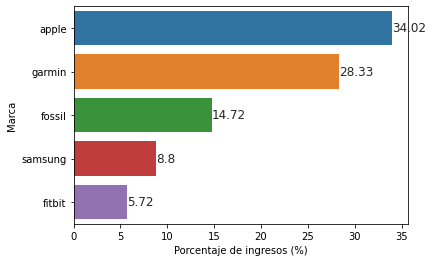

In [38]:
import seaborn as sns
 
porcentajes = round(totalByBrand["Total Income"]*100/totalByBrand["Total Income"].sum(), 2)
totalByBrand["Income Percentage"] = porcentajes

percByBrand = sns.barplot(x="Income Percentage", y="Brand Name", data=totalByBrand[0:5].reset_index())

sns.set(rc={'figure.figsize':(17,8)})

percByBrand.set(xlabel="Porcentaje de ingresos (%)", ylabel = "Marca")

percByBrand.bar_label(percByBrand.containers[0]);



### 7. Estudia la correlación entre las variables y represéntala de la forma que consideres más precisa (swarmplots, mapas de calor…). ¿Existe alguna correlación que llame especialmente la atención? Comenta los resultados.

In [39]:
datos.corr()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days),Ratio,Reviews
Selling Price,1.000000,0.982482,0.297304,0.142029,-0.452404,-0.371417
Original Price,0.982482,1.000000,0.296131,0.189265,-0.461698,-0.420695
Rating (Out of 5),0.297304,0.296131,1.000000,-0.162465,-0.198985,0.104887
Average Battery Life (in days),0.142029,0.189265,-0.162465,1.000000,0.276965,-0.140554
Ratio,-0.452404,-0.461698,-0.198985,0.276965,1.000000,0.194554
Reviews,-0.371417,-0.420695,0.104887,-0.140554,0.194554,1.000000


Utilizar el método **corr()** a secas nos devuelve la correlación entre variables numéricas. Sin embargo, tenemos varias variables cualitativas que pueden ser de mucha utilidad, como **Brand Name**, **Device Type** o **Model Name**. Las factorizaremos y calcularemos de nuevo las correlaciones:

In [57]:
datos_cuant = datos.apply(lambda x : pd.factorize(x)[0])

datos_corr = datos_cuant.corr(method='pearson', min_periods=1)

datos_corr

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Ratio,Reviews
Brand Name,1.000000,0.606978,0.627144,0.344187,0.639321,0.676922,0.134827,0.261992,0.344078,0.463683,0.681349,0.017476
Device Type,0.606978,1.000000,0.488786,0.240363,0.438209,0.481119,-0.109797,0.173857,0.248862,0.280982,0.509628,0.096167
Model Name,0.627144,0.488786,1.000000,0.322050,0.713678,0.849938,0.221785,0.178503,0.274449,0.255878,0.812075,-0.201982
Color,0.344187,0.240363,0.322050,1.000000,0.367165,0.348653,0.105277,0.073677,0.208896,0.292162,0.370493,-0.104086
Selling Price,0.639321,0.438209,0.713678,0.367165,1.000000,0.780303,0.276467,0.210530,0.416319,0.474021,0.883067,-0.178182
Original Price,0.676922,0.481119,0.849938,0.348653,0.780303,1.000000,0.199007,0.151001,0.311962,0.348887,0.815427,-0.201509
Display,0.134827,-0.109797,0.221785,0.105277,0.276467,0.199007,1.000000,0.238828,0.518516,0.343632,0.225997,-0.218437
Rating (Out of 5),0.261992,0.173857,0.178503,0.073677,0.210530,0.151001,0.238828,1.000000,0.333754,0.290197,0.197673,-0.140307
Strap Material,0.344078,0.248862,0.274449,0.208896,0.416319,0.311962,0.518516,0.333754,1.000000,0.566156,0.381445,-0.124344
Average Battery Life (in days),0.463683,0.280982,0.255878,0.292162,0.474021,0.348887,0.343632,0.290197,0.566156,1.000000,0.440858,0.027787


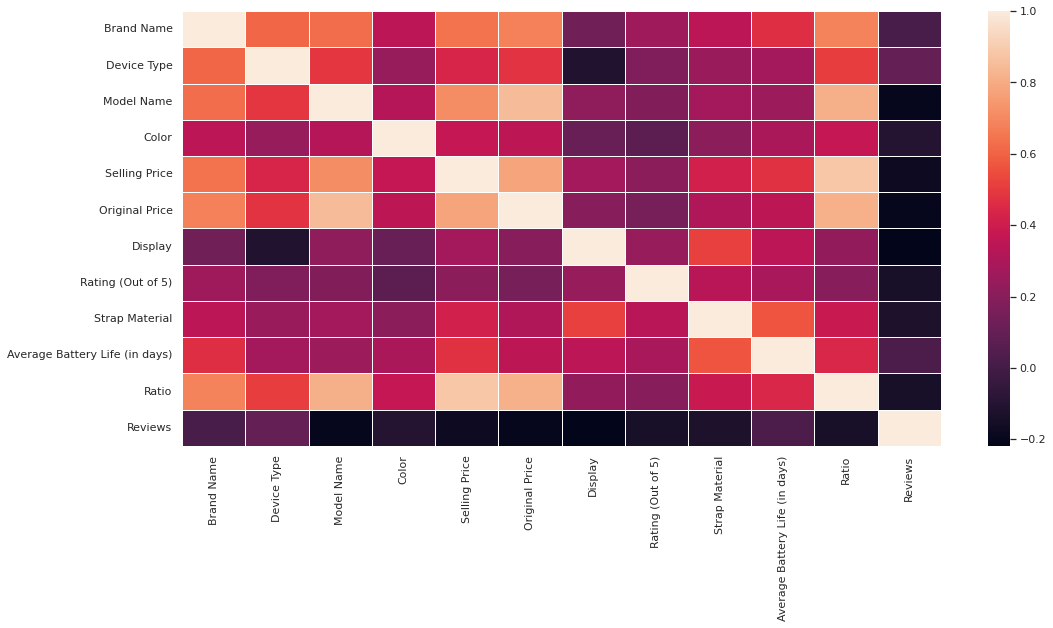

In [47]:
sns.heatmap(datos_corr, linewidths=.5);

La correlación de **Ratio** con las es muy parecida a **Selling Price**, lo cual tiene sentido porque una procede de la otra.

Existe una correlación muy alta entre **Brand Name** y **Device Type**, así como con los precios de venta (la alta correlación con **Model Name** es trivial).

No sorprende que **Model Name** esté muy correlacionada con **Original Price**, puesto que este no cambia, y algo menos con **Selling Price**, que depende de la oferta bajo la cual se produjo la transacción.

Resulta interesante que exista cierta correlación entre **Display** y **Strap Material**, así como entre **Strap Material** y **Average Battery Life (in days)**.

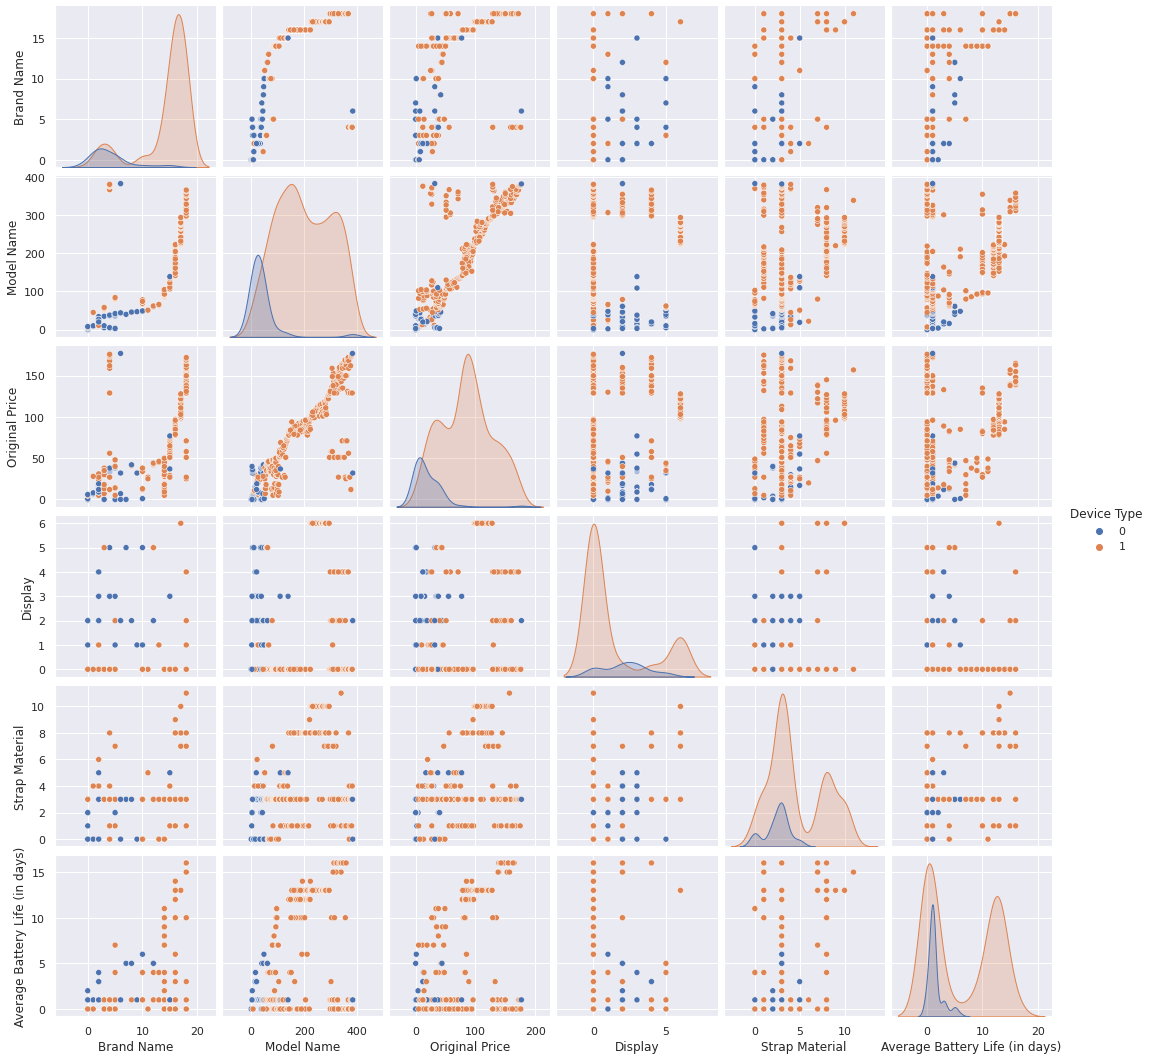

In [61]:
sns.pairplot(datos_cuant[["Brand Name", "Device Type", "Model Name", "Original Price", "Display", "Strap Material", "Average Battery Life (in days)"]], hue="Device Type");

### 8. Representa mediante un boxplot el precio de los dispositivos por marca. Comenta los resultados.

En primer lugar crearemos una lista con las marcas ordenadas por mediana de **Selling Price**:

In [41]:
mediana_index = datos[["Brand Name", "Selling Price"]].groupby("Brand Name").median().sort_values(by=["Selling Price"], ascending = False).index

Pasamos a representar el boxplot:

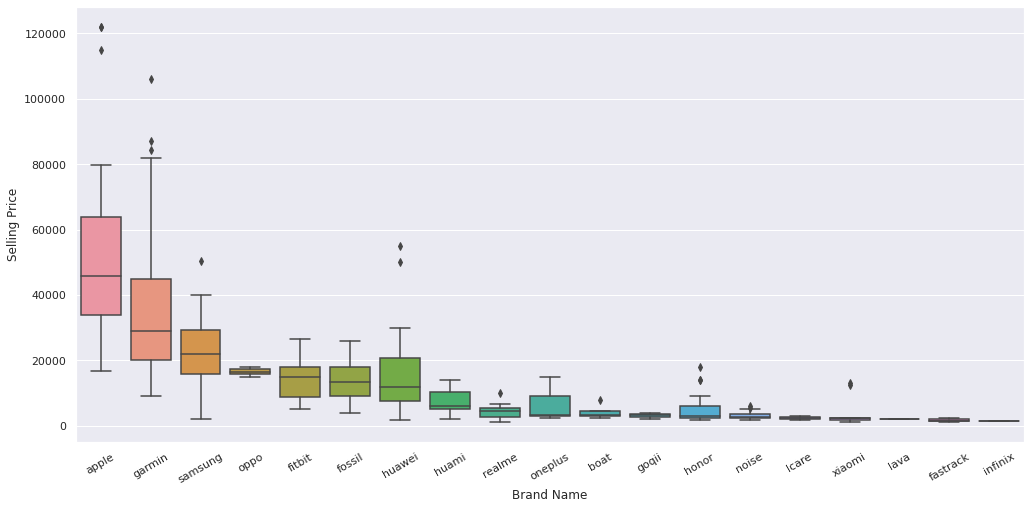

In [42]:
from matplotlib import pyplot as plt

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(17,8)})
bp = sns.boxplot(x = datos["Brand Name"], y = datos["Selling Price"], order = mediana_index);
bp.set_xticklabels(labels=mediana_index, rotation=30);
#bp.set(yscale="log");

Apoyándonos en la información de este gráfico, podemos dividir las marcas en **tres grupos**:

* **Precio alto**: Apple, Garmin y Samsung. Las tres marcas presentan una gran varianza.
* **Precio medio**: Oppo, Fitbit, Fossil y Huawei. Cabe mencionar que Huawei tiene una varianza que destaca en este grupo, ofreciendo algunos precios altos y en otros casos rozando los bajos. La varianza de Oppo es muy pequeña. Estaría bien estudiar si la varianza de esta marca es tan baja porque vendió pocos productos o porque se han vendido pocas unidades.
* **Precio bajo**: el resto. Tenemos las mismas dudas sobre la baja varianza que con Oppo.

### 9. Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

In [ ]:
# Profundizar en las correlaciones del apartado 7